## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.



In [4]:
import pandas as pd
df=pd.read_csv('data_000637.txt')#,nrows=15000)
p=df[df['ORBIT_CNT']==3869200168]

k=df['BX_COUNTER'].max()
print(k)

3563


In [ ]:
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


: 

: 

: 

2\. Find out the number of BX in a ORBIT (the value 'x').


In [ ]:
orbit=df.groupby('ORBIT_CNT')[['BX_COUNTER']].apply(lambda x: x.max() - x.min())
orbit


,BX_COUNTER
ORBIT_CNT,
3869200167,813
3869200168,3531
3869200169,2765
3869200170,2531
3869200171,3417
...,...
3869211167,3507
3869211168,3341
3869211169,3454


: 

: 

: 

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.



In [ ]:
#df2=pd.read_csv('data_000637.txt')

orbit=df.groupby('ORBIT_CNT')[['BX_COUNTER','TDC_MEAS']].apply(lambda x: x.max() - x.min())
print(((orbit['BX_COUNTER'].sum()+orbit['TDC_MEAS'].sum()/30)*25*1e-9), 'seconds' )
#orbit=df.groupby('ORBIT_CNT')['BX_COUNTER'].apply(lambda x: x.max() - x.min()).sum()
#print(orbit)
#a=orbit['BX_COUNTER'].sum()
#a=orbit*25*1e-9
#print(a, 'seconds' )


0.8241795233333334 seconds


: 

: 

: 

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).



In [5]:
#Dado que el maximo de bx es 3564, entonces tendremos que el equivalente a un orbit es 3564*25ns=89100ns=89.1us.
#Luego, para calcular el tiempo total, tenemos que multiplicar el numero de orbits por 89.1us.
df['Abs time']= (df['ORBIT_CNT']*3564+df['BX_COUNTER']+(df['TDC_MEAS']/30))*25.
df
#print((df['Abs time'].max()-df['Abs time'].min())*1e-9)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs time
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.



In [6]:
import numpy.random as npr
npr.seed(42)
df['HEAD']= df['HEAD'].apply(lambda x: npr.choice([0,1]))


In [ ]:
df['HEAD']

0          0
1          1
2          0
3          0
4          0
          ..
1310715    1
1310716    1
1310717    0
1310718    1
1310719    0
Name: HEAD, Length: 1310720, dtype: int32

: 

: 

: 

6\. Create a new DataFrame that contains only the rows with HEAD=1.



In [ ]:
ones=df[df['HEAD']==1]
ones

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs time
1,1,0,124,3869200167,2374,27,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
9,1,0,60,3869200167,2788,7,3.447457e+14
14,1,0,56,3869200167,2789,3,3.447457e+14
16,1,1,8,3869200167,2787,14,3.447457e+14
...,...,...,...,...,...,...,...
1310703,1,0,25,3869211171,20,13,3.447467e+14
1310707,1,0,57,3869211171,137,29,3.447467e+14
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14


: 

: 

: 

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel



In [53]:
df['TDC_CHANNEL'].nunique()

133

<Axes: title={'center': 'Orbit counts per TDC channel in FPGA 0'}, xlabel='TDC Channel', ylabel='Frequency'>

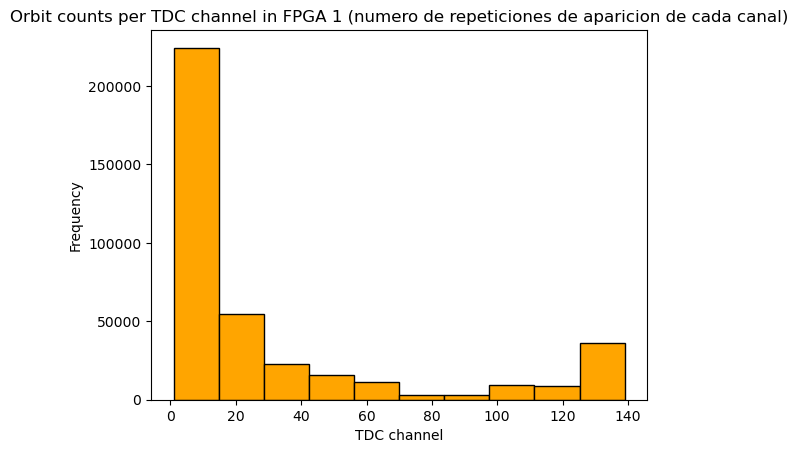

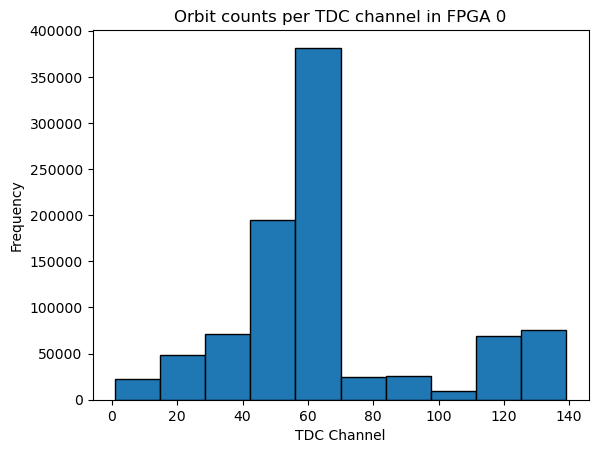

In [ ]:
import matplotlib.pyplot as plt
#10 bins implica que dividi los 139 canales en 13 para tener aproximadamante grupos de 14 canales por bin
plt.figure()
#df1=df[df['FPGA']==1]
df[df['FPGA']==1]['TDC_CHANNEL'].plot.hist(x='TDC_CHANNEL',label='FPGA = 1',
                            color='orange',edgecolor='k',title='Orbit counts per TDC channel in FPGA 1 (numero de repeticiones de aparicion de cada canal)',
                            xlabel='TDC channel'
                            )
plt.figure()
df[df['FPGA']==0]['TDC_CHANNEL'].plot.hist(x='TDC_CHANNEL',edgecolor='k',title='Orbit counts per TDC channel in FPGA 0',
                            xlabel='TDC Channel')

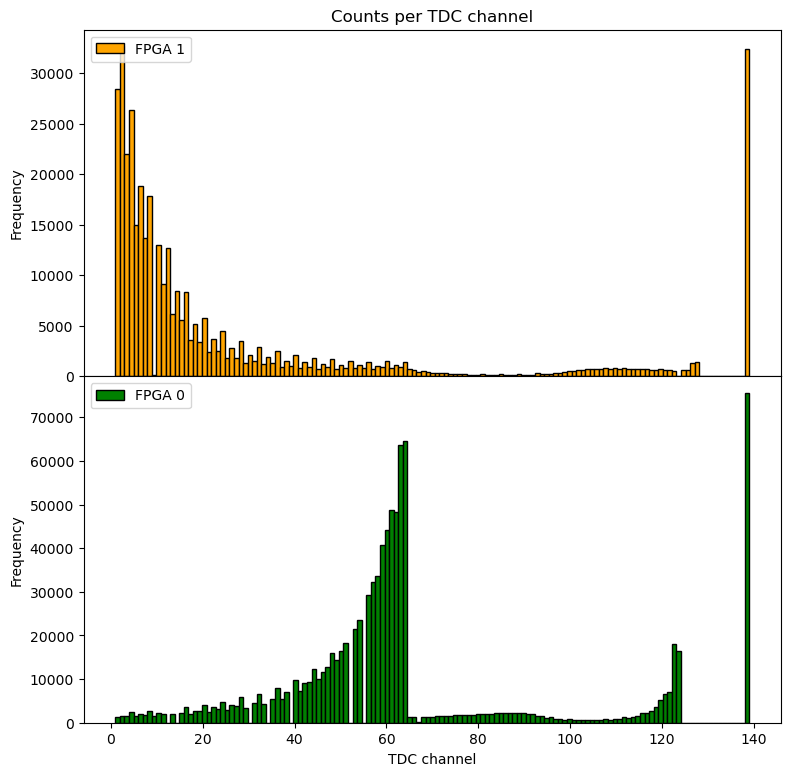

In [79]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(9,9),sharex=True)
df[df['FPGA']==1]['TDC_CHANNEL'].plot.hist(ax=ax1,color='orange',label='FPGA 1',edgecolor='k',bins=139)
ax1.set_title('Counts per TDC channel')
ax1.legend(loc=2)
df[df['FPGA']==0]['TDC_CHANNEL'].plot.hist(ax=ax2,color='green',label='FPGA 0',edgecolor='k',bins=139)
plt.subplots_adjust(hspace=0)
ax2.set_xlabel('TDC channel')
ax2.legend()
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)



In [61]:
k=df.groupby('TDC_CHANNEL').count()
k['ORBIT_CNT'].sort_values(ascending=False)

TDC_CHANNEL
139    108059
64      66020
63      64642
61      49479
62      49349
        ...  
126       606
130        71
138        70
137        68
129        37
Name: ORBIT_CNT, Length: 133, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [76]:
print('We have in total', df['ORBIT_CNT'].nunique(), 'unique orbits')
#filtro=df.groupby('ORBIT_CNT').filter(df['TDC_CHANNEL']==139)
grupo2=df[df['TDC_CHANNEL']==139]
print('The number of orbits with at least one measurement from the channel 139 is ', grupo2['ORBIT_CNT'].nunique())

We have in total 11001 unique orbits
The number of orbits with at least one measurement from the channel 139 is  10976
